In [2]:
import numpy as np
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from sklearn.metrics import mean_squared_error
import math
import torch
import matplotlib.pyplot as plt
import graphviz


c:\Users\Julian\Documents\RepositoriosPersonales\GPU_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# Cargamos los datos de entrenamiento
#X, y = load_boston(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# torch.linspace(-math.pi, math.pi, 2000)
#X_train = np.random.normal(-math.pi, math.pi, 2000)
X_train = torch.linspace(-math.pi, math.pi, 2000).numpy()
y_train = X_train * X_train #+ 45

X_test = torch.linspace(-math.pi, math.pi, 200).numpy() * np.random.rand(1)
y_test = X_test * X_test #+ 45

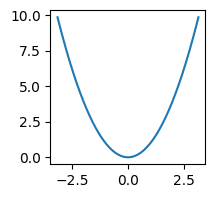

In [16]:
plt.figure(figsize=(2,2))
plt.plot(X_train, y_train)

In [17]:
#array.reshape(-1, 1)
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [18]:
X_train.shape

(2000, 1)

In [19]:
X_train.reshape(-1,1).shape

(2000, 1)

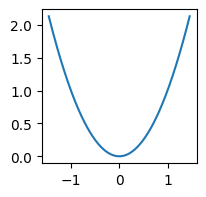

In [20]:
plt.figure(figsize=(2,2))
plt.plot(X_test, y_test )

In [21]:
est = SymbolicRegressor()
est.fit(X_train, y_train)

c:\Users\Julian\Documents\RepositoriosPersonales\GPU_venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SymbolicRegressor()

In [22]:
# Hacemos las predicciones
y_pred = est.predict(X_test)

In [23]:
# Evaluamos el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.0


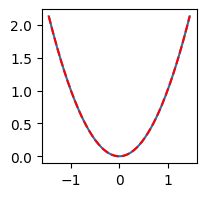

In [24]:
plt.figure(figsize=(2,2))
plt.plot(X_test, y_test)
plt.plot(X_test, y_pred, "r--")

In [25]:
est.get_params()

{'const_range': (-1.0, 1.0),
 'feature_names': None,
 'function_set': ('add', 'sub', 'mul', 'div'),
 'generations': 20,
 'init_depth': (2, 6),
 'init_method': 'half and half',
 'low_memory': False,
 'max_samples': 1.0,
 'metric': 'mean absolute error',
 'n_jobs': 1,
 'p_crossover': 0.9,
 'p_hoist_mutation': 0.01,
 'p_point_mutation': 0.01,
 'p_point_replace': 0.05,
 'p_subtree_mutation': 0.01,
 'parsimony_coefficient': 0.001,
 'population_size': 1000,
 'random_state': None,
 'stopping_criteria': 0.0,
 'tournament_size': 20,
 'verbose': 0,
 'warm_start': False}

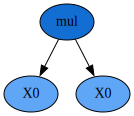

In [26]:
d = est._program.export_graphviz()
graphviz.Source(d)